In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
data = pd.read_csv("Russia vs Ukraine Tweets.csv")
data.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1523133006453649409,1523132202455764992,2022-05-08 02:49:41 UTC,2022-05-08,02:49:41,0,1519687703910092802,reeal_lifeee,real life,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SandyxB', 'name': 'SandyxB',...",NaN,NaN,NaN,NaN
1,1523132987906306048,1523086372156116993,2022-05-08 02:49:37 UTC,2022-05-08,02:49:37,0,1442332250817794048,williamsonrw2,Richard W Sampson.,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'tasmaniacal1', 'name': 'Agam...",NaN,NaN,NaN,NaN
2,1523132980440403969,1523058489194692608,2022-05-08 02:49:35 UTC,2022-05-08,02:49:35,0,1356076303733174273,technoodlen,Eminence_grise,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'GVMNTCHS', 'name': 'GVMNTCHS...",NaN,NaN,NaN,NaN
3,1523132974228975617,1523053912248397825,2022-05-08 02:49:34 UTC,2022-05-08,02:49:34,0,1395382752870948867,kaihua94069167,Halewood 好德,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nexta_tv', 'name': 'NEXTA', ...",NaN,NaN,NaN,NaN
4,1523132971435364352,1523052246430359553,2022-05-08 02:49:33 UTC,2022-05-08,02:49:33,0,1421579978005692420,fedupamerican98,Fed Up American,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'DCWeatherAlert', 'name': 'io...",NaN,NaN,NaN,NaN


In [3]:
data.shape

(10000, 36)

In [4]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


### We only need three columns for this task (username, tweet, and language); I will only select these columns

In [5]:
data = data[["username", "tweet", "language"]]

In [6]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [7]:
data["language"].value_counts()

en     8848
pt      409
it      174
und     156
in       69
ru       52
ja       48
es       39
ca       19
de       17
ar       16
el       14
fi       14
ur       13
th       13
ro       11
tr       11
hi       10
fr        9
zh        9
pl        8
nl        7
tl        6
uk        3
ht        3
vi        3
fa        2
ta        2
da        2
cs        2
cy        2
sl        1
ko        1
et        1
kn        1
sv        1
mr        1
sr        1
no        1
te        1
Name: language, dtype: int64

###  Here I will remove all the links, punctuation, symbols and other language errors from the tweets

In [8]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIKHIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets

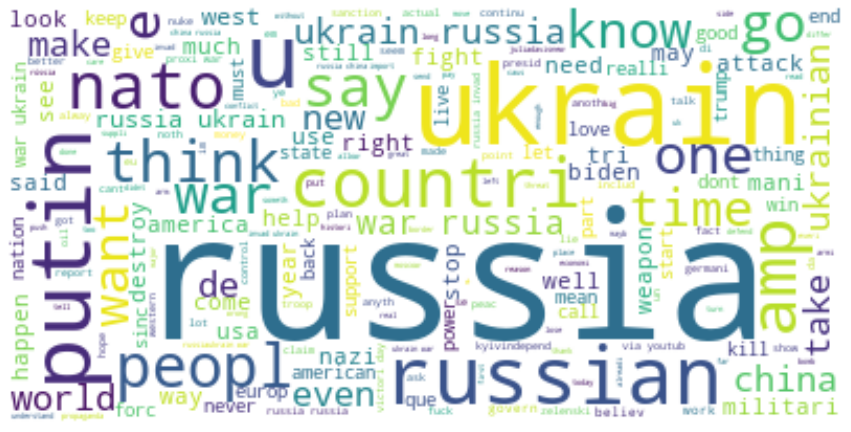

In [9]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets

In [10]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\NIKHIL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0  sandyxb 🔺write souvenir photo russian soldier ...     0.000     0.000   
1   even last resort russia threaten bar sabotag ...     0.000     0.224   
2  gvmntchs issu easili  men fight age russia mot...     0.000     0.148   
3  nextatv chines tech compani less like violat u...     0.077     0.226   
4  dcweatheralert sanasae yeah complet ignor ukra...     0.146     0.258   

   Neutral  
0    1.000  
1    0.776  
2    0.852  
3    0.697  
4    0.596  


### most frequent words used by people with positive sentiments

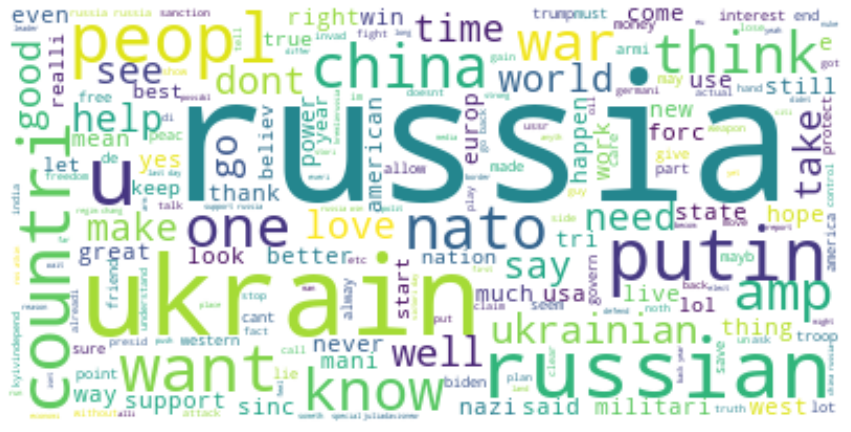

In [11]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### most frequent words used by people with negative sentiments

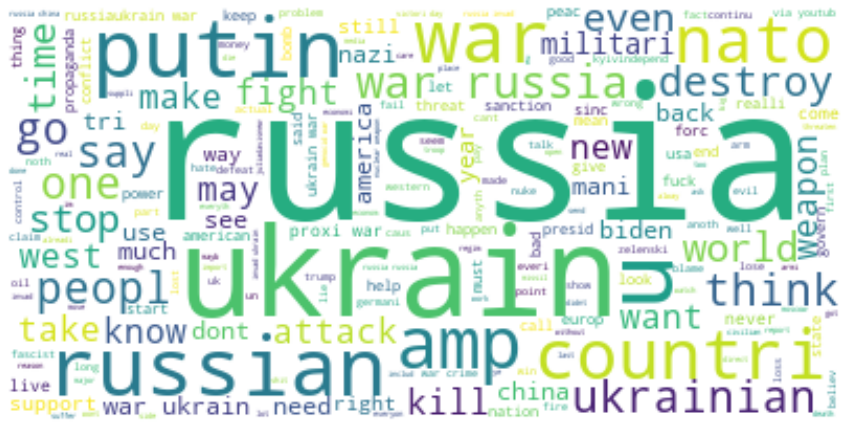

In [12]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()